<a href="https://colab.research.google.com/github/lucaznguyen/medical-paper/blob/main/EHR_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score, log_loss
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

from sklearn.preprocessing import QuantileTransformer
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

from sklearn_pandas import DataFrameMapper, gen_features

from sklearn.decomposition import PCA

import plotly.express as px

import xgboost as xgb

#Import data

In [ ]:
data = pd.read_csv("parkinson's_disease_classification_prepared.csv") 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 756 entries, measurement_id to class
dtypes: float64(749), int64(7)
memory usage: 4.4 MB


In [ ]:
data.head()

measurement_id  id  gender      PPE      DFA     RPDE  numPulses  \
0               1   0       1  0.85247  0.71826  0.57227        240   
1               2   0       1  0.76686  0.69481  0.53966        234   
2               3   0       1  0.85083  0.67604  0.58982        232   
3               4   1       0  0.41121  0.79672  0.59257        178   
4               5   1       0  0.32790  0.79782  0.53028        236   

   numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  ...  \
0               239          0.008064            0.000087  ...   
1               233          0.008258            0.000073  ...   
2               231          0.008340            0.000060  ...   
3               177          0.010858            0.000183  ...   
4               235          0.008162            0.002669  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2                     1.5643                     2.3308   
3                     3.7805                     3.5664   
4                     6.1727                     5.8416   

   tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31  \
0                     3.8686                     4.2105   
1                    23.5155                    14.1962   
2                     9.4959                    10.7458   
3                     5.2558                    14.0403   
4                     6.0805                     5.7621   

   tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33  \
0                     5.1221                     4.4625   
1                    11.0261                     9.5082   
2                    11.0177                     4.8066   
3                     4.2235                     4.6857   
4                     7.7817                    11.6891   

   tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
0                     2.6202                     3.0004   
1                     6.5245                     6.3431   
2                     2.9199                     3.1495   
3                     4.8460                     6.2650   
4                     8.2103                     5.0559   

   tqwt_kurtosisValue_dec_36  class  
0                    18.9405      1  
1                    45.1780      1  
2                     4.7666      1  
3                     4.0603      1  
4                     6.1164      1  

[5 rows x 756 columns]

In [ ]:
data.describe()

measurement_id          id      gender         PPE         DFA  \
count      756.000000  756.000000  756.000000  756.000000  756.000000   
mean       378.500000  125.500000    0.515873    0.746284    0.700414   
std        218.382692   72.793721    0.500079    0.169294    0.069718   
min          1.000000    0.000000    0.000000    0.041551    0.543500   
25%        189.750000   62.750000    0.000000    0.762833    0.647053   
50%        378.500000  125.500000    1.000000    0.809655    0.700525   
75%        567.250000  188.250000    1.000000    0.834315    0.754985   
max        756.000000  251.000000    1.000000    0.907660    0.852640   

             RPDE   numPulses  numPeriodsPulses  meanPeriodPulses  \
count  756.000000  756.000000        756.000000        756.000000   
mean     0.489058  323.972222        322.678571          0.006360   
std      0.137442   99.219059         99.402499          0.001826   
min      0.154300    2.000000          1.000000          0.002107   
25%      0.386537  251.000000        250.000000          0.005003   
50%      0.484355  317.000000        316.000000          0.006048   
75%      0.586515  384.250000        383.250000          0.007528   
max      0.871230  907.000000        905.000000          0.012966   

       stdDevPeriodPulses  ...  tqwt_kurtosisValue_dec_28  \
count          756.000000  ...                 756.000000   
mean             0.000383  ...                  26.237251   
std              0.000728  ...                  42.220693   
min              0.000011  ...                   1.509800   
25%              0.000049  ...                   2.408675   
50%              0.000077  ...                   5.586300   
75%              0.000171  ...                  28.958075   
max              0.003483  ...                 239.788800   

       tqwt_kurtosisValue_dec_29  tqwt_kurtosisValue_dec_30  \
count                 756.000000                 756.000000   
mean                   22.840337                  18.587888   
std                    32.626464                  25.537464   
min                     1.531700                   1.582900   
25%                     3.452800                   3.354825   
50%                     7.062750                   6.077400   
75%                    29.830850                  21.944050   
max                   203.311300                 121.542900   

       tqwt_kurtosisValue_dec_31  tqwt_kurtosisValue_dec_32  \
count                 756.000000                 756.000000   
mean                   13.872018                  12.218953   
std                    20.046029                  17.783642   
min                     1.747200                   1.789500   
25%                     3.077450                   2.937025   
50%                     4.770850                   4.300450   
75%                    13.188000                  10.876150   
max                   102.207000                  85.571700   

       tqwt_kurtosisValue_dec_33  tqwt_kurtosisValue_dec_34  \
count                 756.000000                 756.000000   
mean                   12.375335                  14.799230   
std                    16.341665                  15.722502   
min                     1.628700                   1.861700   
25%                     3.114375                   3.665925   
50%                     4.741450                   6.725700   
75%                    12.201325                  21.922050   
max                    73.532200                  62.007300   

       tqwt_kurtosisValue_dec_35  tqwt_kurtosisValue_dec_36       class  
count                 756.000000                 756.000000  756.000000  
mean                   14.751559                  31.481110    0.746032  
std                    14.432979                  34.230991    0.435568  
min                     1.955900                   2.364000    0.000000  
25%                     3.741275                   3.948750    0.000000  
50%                     7.334

In [ ]:
null_values=data.isnull().sum()
null_values=pd.DataFrame(null_values, columns=['null'])
j=1
sum_tot=len(data)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent', ascending=False)

null  percent
measurement_id                0      0.0
tqwt_medianValue_dec_6        0      0.0
tqwt_TKEO_std_dec_33          0      0.0
tqwt_TKEO_std_dec_34          0      0.0
tqwt_TKEO_std_dec_35          0      0.0
...                         ...      ...
det_LT_entropy_log_1_coef     0      0.0
det_LT_entropy_log_2_coef     0      0.0
det_LT_entropy_log_3_coef     0      0.0
det_LT_entropy_log_4_coef     0      0.0
class                         0      0.0

[756 rows x 2 columns]

#Visualization

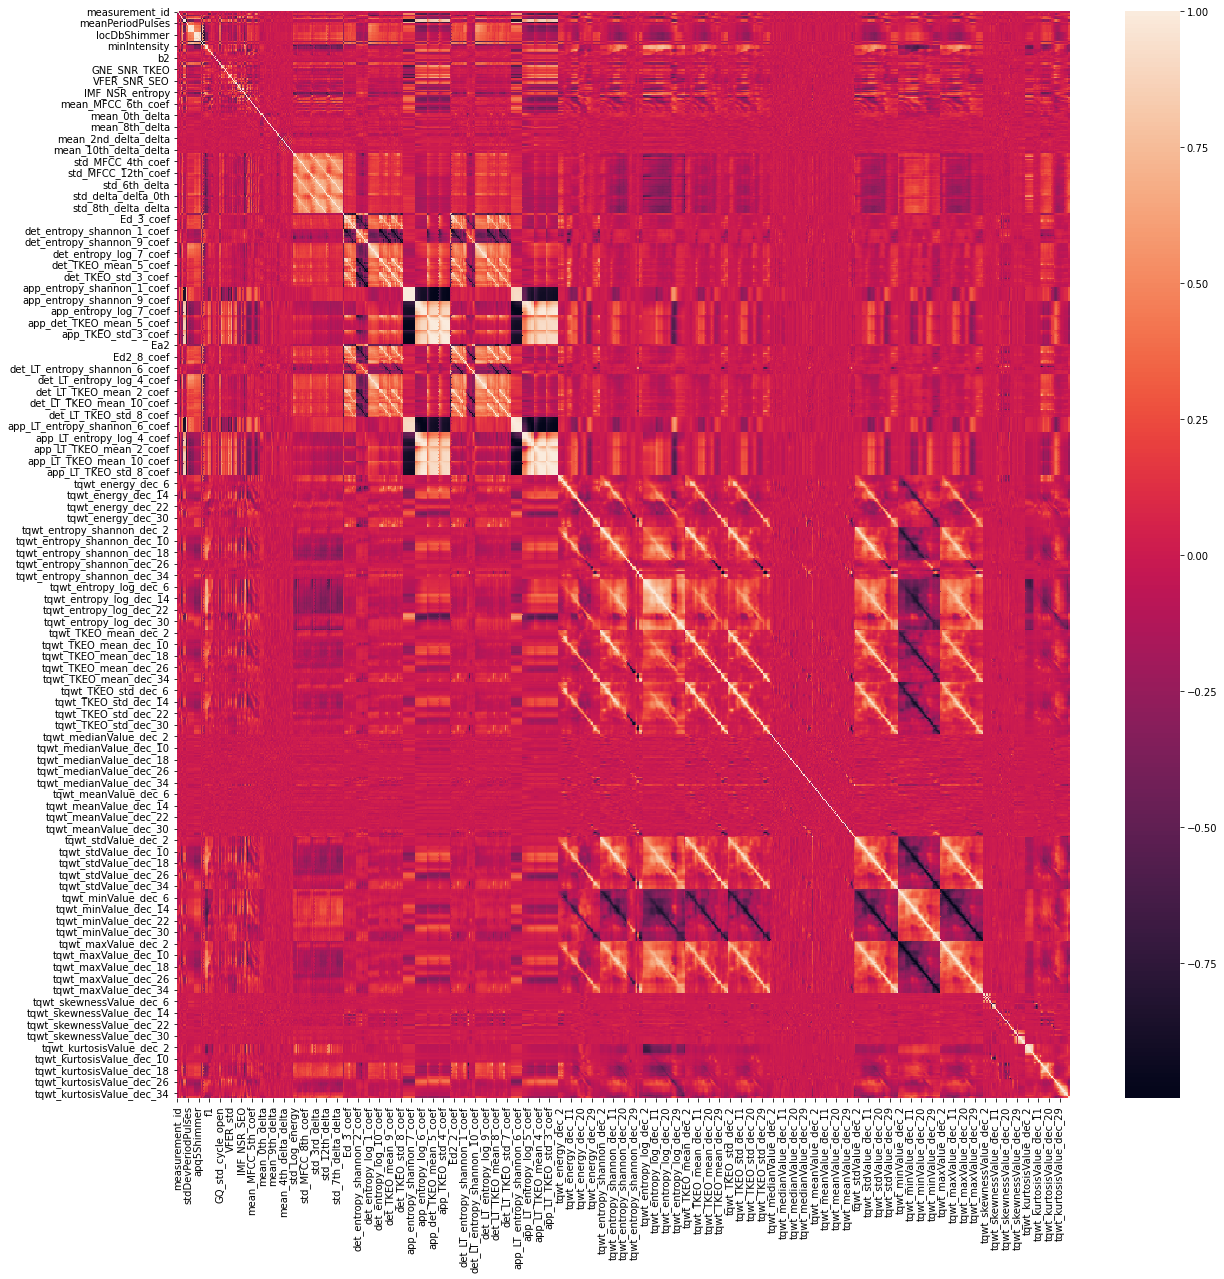

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

plt.savefig("heatmap_full.png")

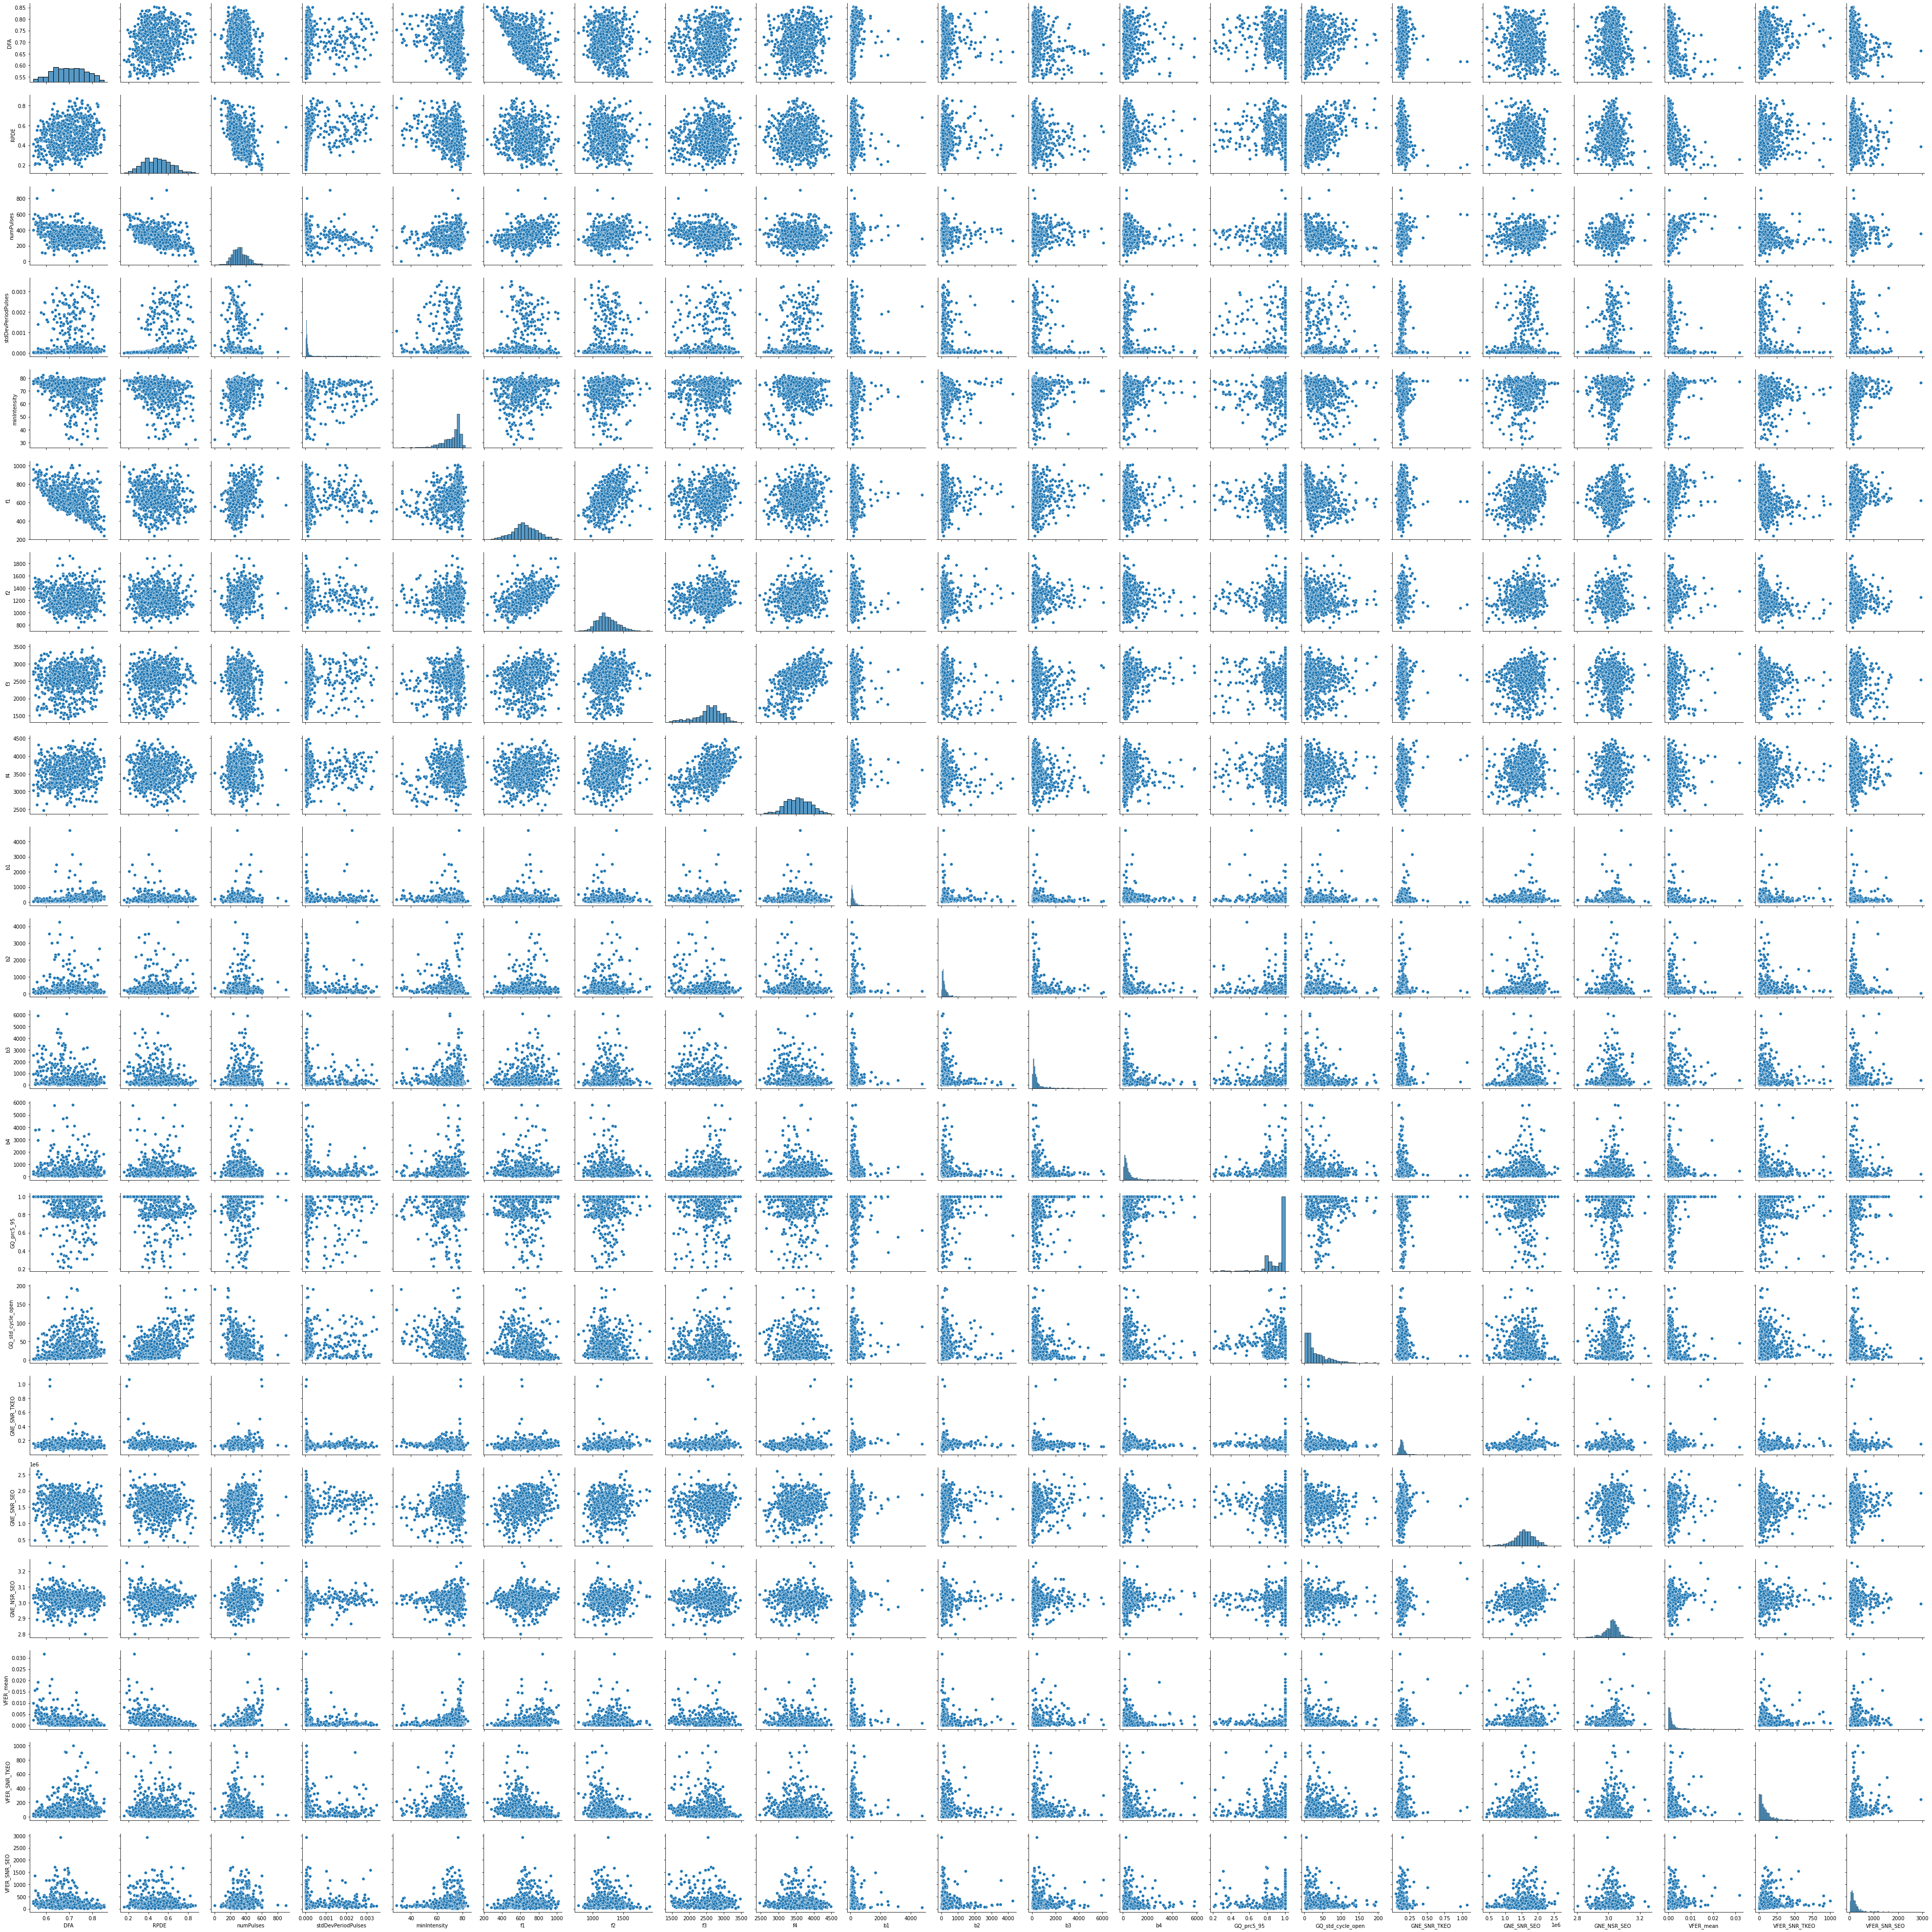

In [ ]:
g = sns.pairplot(data=X.iloc[:, 2:23], 
                 kind='scatter')

plt.tight_layout()
plt.savefig("pairplot_full.png")

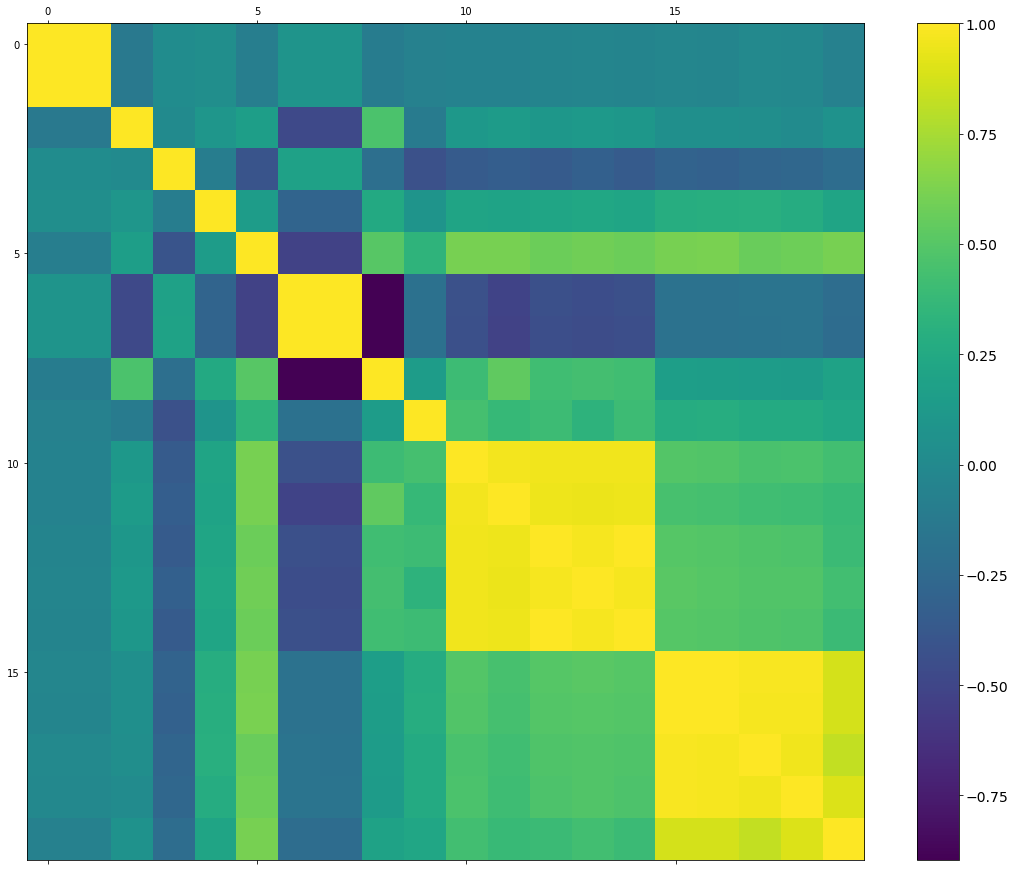

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data[data.columns[0:20]].corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.savefig("matshow_full.png")
plt.show()

# sns.heatmap(data[data.columns[0:20]].corr(), annot=True)

In [ ]:
data[data.columns[0:20]].corr().style.background_gradient(cmap='coolwarm')

#Remove correlation columns

In [ ]:
corr=data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

data_drop = data.copy()

# Drop features 
for column in to_drop:  
  data_drop=data_drop.drop(column,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


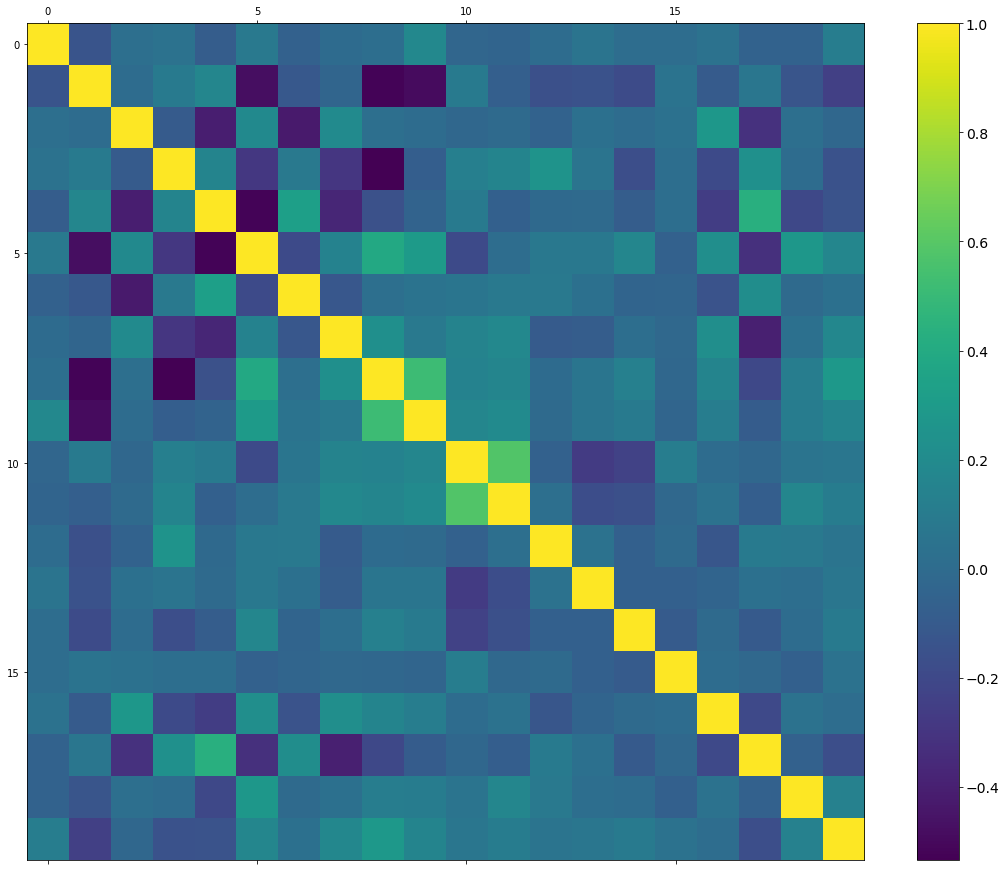

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data_drop[data_drop.columns[0:20]].corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.savefig("matshow_drop.png")
plt.show()

# sns.heatmap(data[data.columns[0:20]].corr(), annot=True)

In [ ]:
data_drop[data_drop.columns[0:20]].corr().style.background_gradient(cmap='coolwarm')

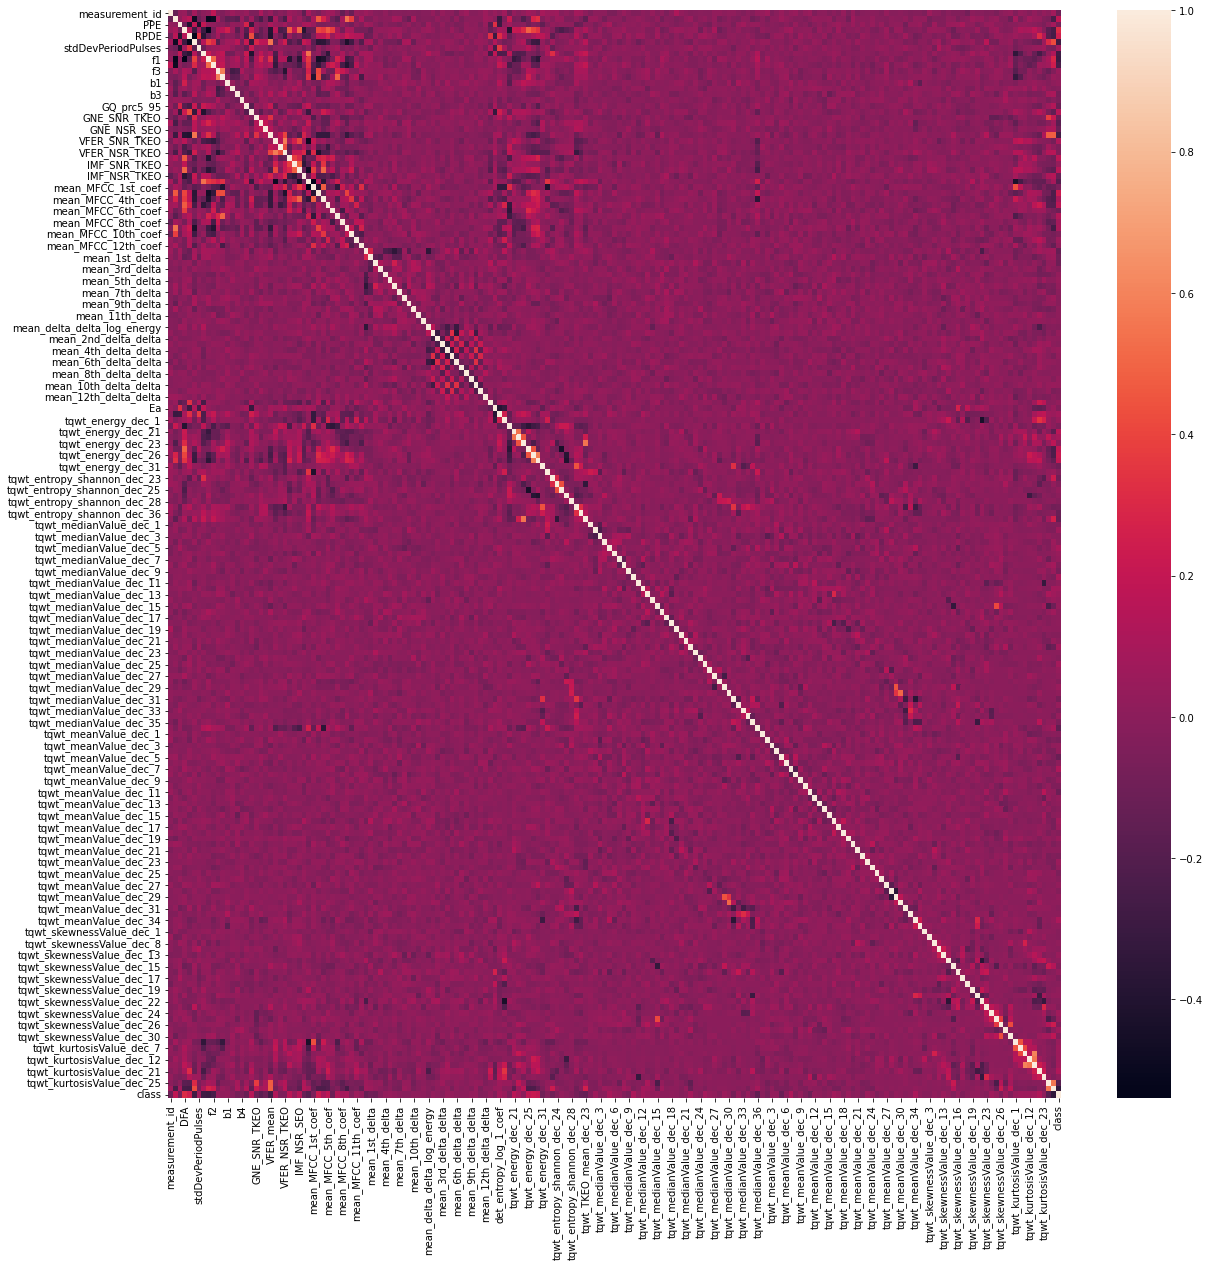

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_drop.corr())
plt.savefig("heatmap_drop.png")

#Train the model

In [ ]:
y = data_drop.loc[:,'class']
X = data_drop.drop(['class', 'measurement_id'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

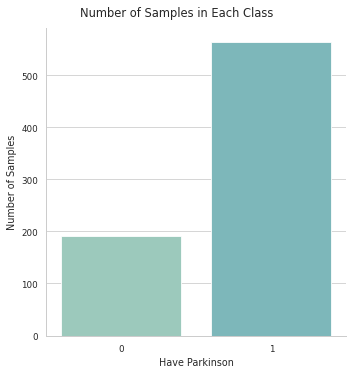

In [ ]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='class', data=data_drop, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Have Parkinson')
plt.savefig("class.png")
plt.show()

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.1 MB/s 
     |████████████████████████████████| 199 kB 65.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rdclass=RandomForestClassifier()
rdclass.fit(X_train_SMOTE, y_train_SMOTE)
ypred=rdclass.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test, ypred))

[[ 20  11]
 [  9 112]]
0.868421052631579


In [ ]:
models = {
    '           Linear SVM': LinearSVC(),
    '        XGBClassifier': xgb.XGBClassifier(),
    '    Gradient Boosting': GradientBoostingClassifier(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier(),
    '   Bagging Classifier': BaggingClassifier(),
    '                  svc':       SVC()
}

for name, model in models.items():
    model = model.fit(X_train_SMOTE, y_train_SMOTE)
    print(name + " trained")

           Linear SVM trained
        XGBClassifier trained
    Gradient Boosting trained
        Decision Tree trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained
                  svc trained


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

           Linear SVM: 80.92%
        XGBClassifier: 87.50%
    Gradient Boosting: 88.82%
        Decision Tree: 82.24%
        Random Forest: 86.84%
 KNeighborsClassifier: 78.29%
   Bagging Classifier: 86.84%
                  svc: 78.95%


In [ ]:
y_full = data.loc[:,'class']
X_full = data.drop(['class', 'measurement_id'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full,
                                                                        test_size=0.2, random_state=8)

In [ ]:
models = {
    '           Linear SVM': LinearSVC(),
    '        XGBClassifier': xgb.XGBClassifier(),
    '    Gradient Boosting': GradientBoostingClassifier(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier(),
    '   Bagging Classifier': BaggingClassifier(),
    '                  svc':       SVC()
}

for name, model in models.items():
    model = model.fit(X_train_full, y_train_full)
    print(name + " trained")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


           Linear SVM trained
        XGBClassifier trained
    Gradient Boosting trained
        Decision Tree trained
        Random Forest trained
 KNeighborsClassifier trained
   Bagging Classifier trained
                  svc trained


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test_full, y_test_full) * 100))

           Linear SVM: 25.66%
        XGBClassifier: 91.45%
    Gradient Boosting: 88.82%
        Decision Tree: 75.66%
        Random Forest: 90.79%
 KNeighborsClassifier: 71.05%
   Bagging Classifier: 89.47%
                  svc: 80.26%


#PCA

In [ ]:
scaler = gen_features(
    columns = [[c] for c in X.columns.values if c not in ['gender', 'id']],
    classes=[{'class': QuantileTransformer, 'output_distribution': 'normal'}]
)

scaling_mapper = DataFrameMapper(scaler, default=None, df_out=True)
X_scaled = scaling_mapper.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning:

n_quantiles (1000) is greater than the total number of samples (756). n_quantiles is set to n_samples.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning:

n_quantiles (1000) is greater than the total number of samples (756). n_quantiles is set to n_samples.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning:

n_quantiles (1000) is greater than the total number of samples (756). n_quantiles is set to n_samples.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning:

n_quantiles (1000) is greater than the total number of samples (756). n_quantiles is set to n_samples.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning:

n_quantiles (1000) is greater than the total number of samples (756). n_quantiles is set to n_samples.

/usr/local/lib/python3.7/dist-

In [ ]:
pca_data = PCA(n_components=3).fit_transform(X_scaled.drop(columns=['gender']))
plot_df = pd.DataFrame.from_records(data=pca_data,columns=['pc1','pc2', 'pc3'])
plot_df['target'] = y
fig = px.scatter_3d(plot_df, x='pc1', y='pc2', z='pc3', color='target', width=800, height=800)
fig.show()

In [ ]:
EXPLAINED_VARIANCE = 0.99

pca = PCA(n_components=EXPLAINED_VARIANCE).fit(X_scaled.drop(columns=['gender']))

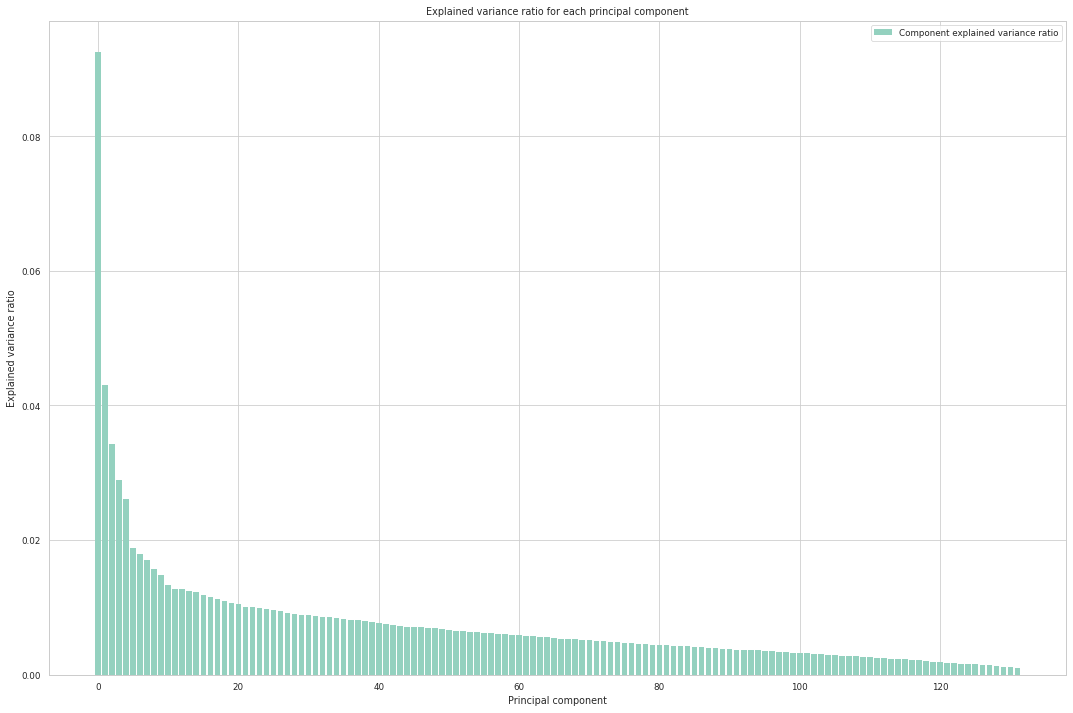

In [ ]:
plt.figure(figsize=(15, 10))

plt.bar(range(len(pca.explained_variance_)), pca.explained_variance_ratio_, align='center',
        label='Component explained variance ratio', edgecolor = "none")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Explained variance ratio for each principal component')
plt.legend()
plt.tight_layout()

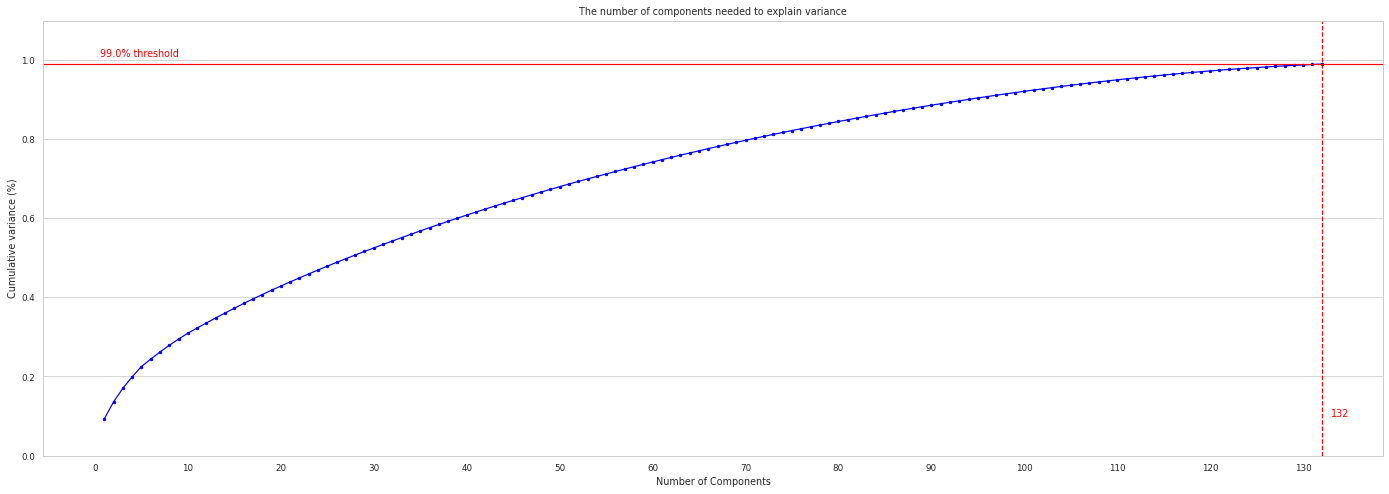

In [ ]:
n_components = len(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(24, 8))
x_ticks = np.arange(1, n_components + 1, step=1)
y_values = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(x_ticks, y_values, marker='.', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n_components + 1, step=10))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=EXPLAINED_VARIANCE, color='r', linestyle='-')

plt.axvline(x=n_components, color='r', linestyle='--')

plt.text(0.5, 1.01, f'{EXPLAINED_VARIANCE*100}% threshold', color = 'red')
plt.text(n_components + 1, 0.1, f'{n_components}', color = 'red')

ax.grid(axis='x')
plt.xticks(rotation=0)
plt.show()

In [ ]:
pca.explained_variance_ratio_[:150].sum()

0.9901700742234069

In [ ]:
from typing import Tuple

def perform_pca(X_train, X_test, explained_variance) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Performs PCA on X_train and X_test
    
    Parameters
    ----------
    X_train : Train data set to fit PCA
    X_test : Test data set to tranform with PCA  
    
    Returns
    -------
    X_train_pca : PCA-transformed train data set 
    y_test_pca : PCA-transformed test data set
    """
    pca = PCA(n_components=explained_variance).fit(X_train.drop(columns='gender'))
    pca_train_data = pca.transform(X_train.drop(columns='gender'))
    pca_test_data = pca.transform(X_test.drop(columns='gender'))
    
    X_train_pca = pd.DataFrame.from_records(data=pca_train_data)
    
    #reset index to map id and gender to pca data (train)
    X_train.reset_index(inplace=True)
    X_train_pca['gender'] = X_train['gender']
    
    X_test_pca = pd.DataFrame.from_records(data=pca_test_data)
    
    #reset index to map id and gender to pca data (test)
    X_test.reset_index(inplace=True)
    X_test_pca['gender'] = X_test['gender']
    
    return X_train_pca, X_test_pca

In [ ]:
train_pca, test_pca = perform_pca(X_scaled[:600], X_scaled[600:], 150)

In [ ]:
setting = {
    'pca': 150,
    'X': X,
    'y': y
}

RANDOM_STATE = 42

models = [
    dict({'estimator': KNeighborsClassifier(n_jobs=-1),
          'scaling': scaling_mapper}, 
         **setting),
    dict({'estimator': LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1),
          'scaling': scaling_mapper}, 
         **setting),
    dict({'estimator': DecisionTreeClassifier(max_depth=6, random_state=RANDOM_STATE)}, 
         **setting),
    dict({'estimator': RandomForestClassifier(max_depth=7, random_state=RANDOM_STATE, n_jobs=-1)}, 
         **setting),
    dict({'estimator': CatBoostClassifier(depth=6, verbose=False, random_seed=RANDOM_STATE)}, 
         **setting),
    dict({'estimator': LGBMClassifier(max_depth=6, random_state=RANDOM_STATE)}, 
         **setting),
    dict({'estimator': XGBClassifier(max_depth=6, verbosity=0, random_state=RANDOM_STATE)}, 
         **setting)
]

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV

def cross_validate(estimator, 
                   X: pd.DataFrame, 
                   y: pd.Series, 
                   print_fold_scores=False, 
                   plot_cm=False, 
                   scaling=False,
                   upsampling=False, 
                   resampling=False, 
                   pca=False) -> pd.DataFrame:
    """Calculates estimators's cross-validation scores on (X, y) dataset 
    
    Parameters
    ----------
    estimator : estimator to evaluate
    X : Data set to cross-validate on
    y : Data set target labels
    print_fold_scores : Set to True to print scores for each fold in cv
    plot_cm : Set to True to plot cofusion matrix
    scaling : DataFrameMapper with a scaler in it, used to scale X_train and X_test.
              If False - scaling is not used
    upsampling : Set to True to upsample train data in each fold
    resampling : Set to True to resample train data in each fold
    pca : Used as n_components parameter in PCA. 
          If False - pca is not used 
    
    Returns
    -------
    mean_cv_scores_df : DataFrame with mean cross validation scores for estimator
    """
    # defining scores to evaluate
    cv_scores = {'Accuracy': [],
                 'Recall': [],
                 'Precision': [],
                 'F1': []}
    
    estimator_name = type(estimator).__name__
    
    # Stratify by target and group by id in order to prevent getting records 
    # of one person in train and test set
    fold = StratifiedGroupKFold(5, shuffle=True, random_state=RANDOM_STATE)
    
    for train_index, test_index in fold.split(X, y, groups=X['id']):
        X_train, X_test = X.iloc[train_index].drop(columns='id'), X.iloc[test_index].drop(columns='id')
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # transformations before training
        if scaling:
            scaling.fit(X_train)
            X_train = scaling.transform(X_train)
            X_test = scaling.transform(X_test)
        if upsampling:
            X_train, y_train = upsample(X_train, y_train)
        if resampling:
            X_train, y_train = resample_gender(X_train, y_train)
        if pca:
            X_train, X_test = perform_pca(X_train, X_test, explained_variance=pca)

        estimator.fit(X_train, y_train)

        predictions = estimator.predict(X_test)
        
        cv_scores['Accuracy'].append(accuracy_score(y_test, predictions))
        cv_scores['Recall'].append(recall_score(y_test, predictions, pos_label=1))
        cv_scores['Precision'].append(precision_score(y_test, predictions, pos_label=1))
        cv_scores['F1'].append(f1_score(y_test, predictions, average='binary'))
    
    # prints scores for each fold if True
    if print_fold_scores:
        for item in cv_scores.items():
            print(item)
    
    mean_cv_scores = {k: np.mean(v) for k, v in cv_scores.items()}
    mean_cv_scores_df = pd.DataFrame.from_dict(data={estimator_name: mean_cv_scores.values()}, 
                                               orient='index', 
                                               columns=mean_cv_scores.keys())
    
    if plot_cm:
        plot_confusion_matrix(y_test, predictions, estimator_name)
        
    return mean_cv_scores_df